# Analysis of global Sherwood numbers

The global Sherwood number is analyzed for the following scenarios:

- time dependent behavior for spherical cap, dimpled ellipsoidal, and skirted bubbles with and without reaction
- comparison between slip and Dirichlet boundary condition

## Temporal behavior

In [1]:
import helper_module as hm
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import glob

%matplotlib inline

data_path = "../data/globalSh/"
output_path = "../output/"

def savefig(name):
    plt.savefig(output_path + name + ".png", bbox_inches="tight")
    plt.savefig(output_path + name + ".pdf", bbox_inches="tight")

In [2]:
file_names = bhaga_cases = glob.glob(data_path + "*")
columns = ["t", "gradA", "area"]

all_data = {}
for name in file_names:
    key = name.split("/")[-1].split(".")[0]
    all_data[key] = pd.read_csv(name, header=0, names=columns)
    
all_data["bhaga_04_decay_m3"].tail()

,t,gradA,area
96,96,158.533293,0.123131
97,97,158.533293,0.123131
98,98,158.533293,0.123131
99,99,158.533293,0.123131
100,100,158.533293,0.123131


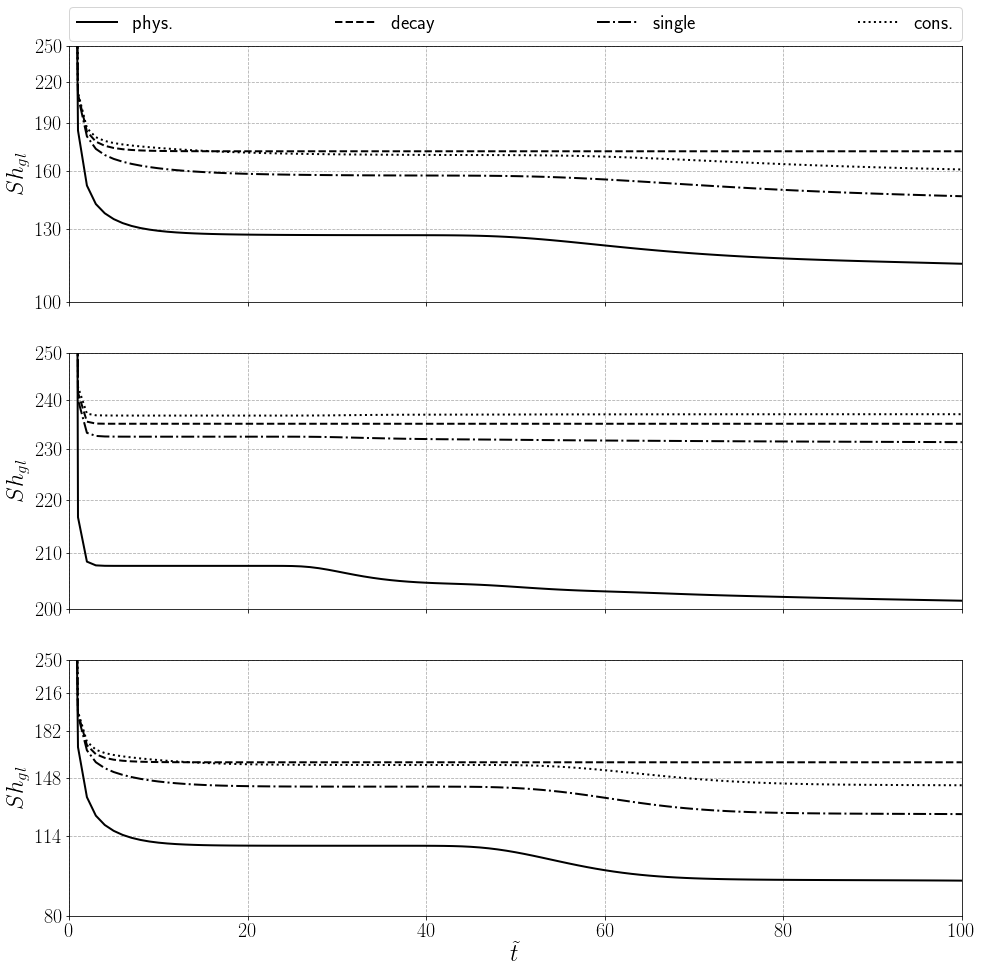

In [3]:
rc('text', usetex=True)
fig, axarr = plt.subplots(3, 1, figsize=(hm.figure_width, 16), sharex=True)

labels = ["phys.", "decay", "single", "cons."]
ls = ["-", "--", "-.", ":"]
y_min = [100, 200, 80]

for i, case in enumerate(["bhaga_02", "bhaga_03", "bhaga_04"]):
    keys = [case + reaction for reaction in ["_phys_m3", "_decay_m3", "_single_m3", "_cons_m3"]]
    for j, key in enumerate(keys):
        data = all_data[key]
        axarr[i].plot(data.t, data.gradA, label=labels[j], ls=ls[j], lw=2, color="k")
    axarr[i].set_ylabel(r"$Sh_{gl}$", fontsize=hm.fontsize_label)
    axarr[i].set_yscale("log")
    axarr[i].tick_params(which='major', labelsize=hm.fontsize_tick)
    axarr[i].minorticks_off()
    axarr[i].set_ylim(y_min[i], 250)
    ticks = np.round(np.linspace(y_min[i], 250, 6), 0)
    axarr[i].set_yticks(ticks)
    axarr[i].get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
    axarr[i].grid(True, ls="--")
    
    
axarr[-1].set_xlabel(r"$\tilde{t}$", fontsize=hm.fontsize_label)
axarr[-1].set_xlim(0, 100)
axarr[0].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
                ncol=4, mode="expand", borderaxespad=0., fontsize=hm.fontsize_legend)
savefig("bhaga_global_sh_over_time")

## Comparison between slip and Dirichlet
### Air-water $d_b=1.8~mm$

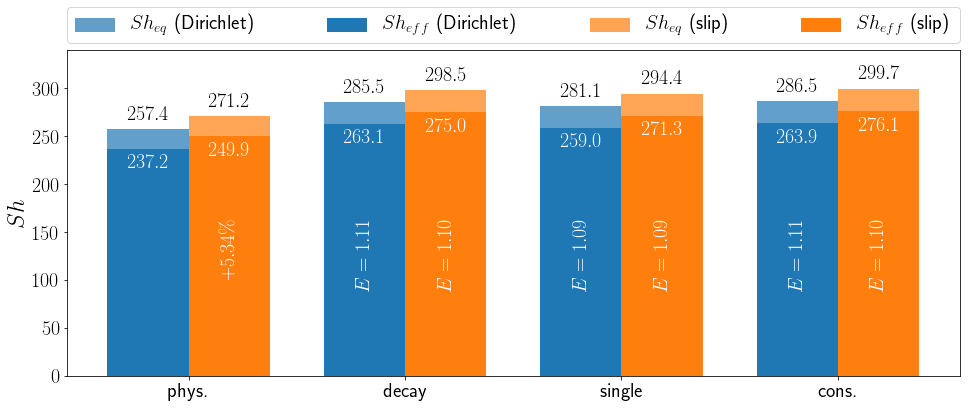

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(hm.figure_width, 6))

names_dir = ["water_05_{:s}_m3".format(reaction) for reaction in ["phys", "decay", "single", "cons"]]
names_slip = ["water_05_{:s}_slip_m3".format(reaction) for reaction in ["phys", "decay", "single", "cons"]]

sh_dir = []
sh_slip = []
for fdir, fslip in zip(names_dir, names_slip):
    data_dir = all_data[fdir]
    data_slip = all_data[fslip]
    sh_dir.append(data_dir[data_dir.t==10].gradA.values[0])
    sh_slip.append(data_slip[data_slip.t==10].gradA.values[0])
    
area_eff = all_data["water_05_phys_m3"].area.values[-1] * 120.0 # area of 3° wedge slice x 120
area_eq = np.pi # equivalent diamter is always d_b=1

x = np.linspace(1, 5, 4)
ax.bar(x, np.asarray(sh_dir) * area_eff/area_eq, width=0.5, color="C0", alpha=0.7, label=r"$Sh_{eq}$ (Dirichlet)")
ax.bar(x, sh_dir, width=0.5, color="C0", label=r"$Sh_{eff}$ (Dirichlet)")
ax.bar(x+0.5, np.asarray(sh_slip) * area_eff/area_eq, width=0.5, color="C1", alpha=0.7, label=r"$Sh_{eq}$ (slip)")
ax.bar(x+0.5, sh_slip, width=0.5, color="C1", label=r"$Sh_{eff}$ (slip)")

# different Dirichlet/slip for physisorption
diff = (sh_slip[0] - sh_dir[0]) / sh_dir[0] * 100
ax.text(x[0]+0.5, 150, r"${:+1.2f}\%$".format(np.around(diff, 2)), color="w", fontsize=hm.fontsize_legend,
       rotation=90, ha="center")

# global Sherwood number text labels
offn = 20
offp = 10
for i, sh in enumerate(sh_dir):
    ax.text(x[i], sh-offn, r"${:1.1f}$".format(np.round(sh, 1)), ha="center", color="w", fontsize=hm.fontsize_legend)
    ax.text(x[i], sh * area_eff/area_eq + offp, r"${:1.1f}$".format(np.round(sh* area_eff/area_eq, 1)), ha="center", fontsize=hm.fontsize_legend)
for i, sh in enumerate(sh_slip):
    ax.text(x[i]+0.5, sh-offn, r"${:1.1f}$".format(np.round(sh, 1)), ha="center", color="w", fontsize=hm.fontsize_legend)
    ax.text(x[i]+0.5, sh * area_eff/area_eq + offp, r"${:1.1f}$".format(np.round(sh * area_eff/area_eq, 1)), ha="center", fontsize=hm.fontsize_legend)
    
# enhancement factors
E_dir = [sh / sh_dir[0] for sh in sh_dir[1:]]
E_slip = [sh / sh_slip[0] for sh in sh_slip[1:]]

for i, xi in enumerate(x[1:]):
    ax.text(xi, 150, r"$E={:1.2f}$".format(np.round(E_dir[i], 2)), rotation=90, color="w", fontsize=hm.fontsize_legend, ha="center")
    ax.text(xi+0.5, 150, r"$E={:1.2f}$".format(np.round(E_slip[i], 2)), rotation=90, color="w", fontsize=hm.fontsize_legend, ha="center")
    
ax.tick_params(which='major', labelsize=hm.fontsize_tick)
ax.set_ylabel(r"$Sh$", fontsize=hm.fontsize_label)
ax.set_ylim(0.0, 340)
ax.set_xticks(x+0.25)
ax.set_xticklabels(["phys.", "decay", "single", "cons."])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=4, mode="expand", borderaxespad=0., fontsize=hm.fontsize_legend)
savefig("water_05_global_sh_dirichlet_vs_slip")

### Dimpled ellipsoidal

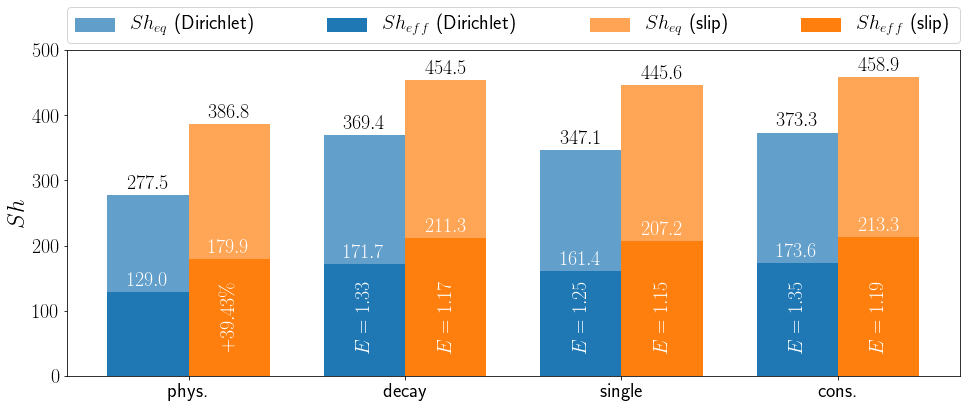

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(hm.figure_width, 6))

names_dir = ["bhaga_02_{:s}_m3".format(reaction) for reaction in ["phys", "decay", "single", "cons"]]
names_slip = ["bhaga_02_{:s}_slip_m3".format(reaction) for reaction in ["phys", "decay", "single", "cons"]]

sh_dir = []
sh_slip = []
for fdir, fslip in zip(names_dir, names_slip):
    data_dir = all_data[fdir]
    data_slip = all_data[fslip]
    sh_dir.append(data_dir[data_dir.t==10].gradA.values[0])
    sh_slip.append(data_slip[data_slip.t==10].gradA.values[0])
    
area_eff = all_data["bhaga_02_phys_m3"].area.values[-1] * 120.0 # area of 3° wedge slice x 120
area_eq = np.pi # equivalent diamter is always d_b=1

x = np.linspace(1, 5, 4)
ax.bar(x, np.asarray(sh_dir) * area_eff/area_eq, width=0.5, color="C0", alpha=0.7, label=r"$Sh_{eq}$ (Dirichlet)")
ax.bar(x, sh_dir, width=0.5, color="C0", label=r"$Sh_{eff}$ (Dirichlet)")
ax.bar(x+0.5, np.asarray(sh_slip) * area_eff/area_eq, width=0.5, color="C1", alpha=0.7, label=r"$Sh_{eq}$ (slip)")
ax.bar(x+0.5, sh_slip, width=0.5, color="C1", label=r"$Sh_{eff}$ (slip)")

# different Dirichlet/slip for physisorption
diff = (sh_slip[0] - sh_dir[0]) / sh_dir[0] * 100
ax.text(x[0]+0.5, 125, r"${:+1.2f}\%$".format(np.around(diff, 2)), color="w", fontsize=hm.fontsize_legend,
       rotation=90, ha="center")

# global Sherwood number text labels
offn = -10
offp = 10
for i, sh in enumerate(sh_dir):
    ax.text(x[i], sh-offn, r"${:1.1f}$".format(np.round(sh, 1)), ha="center", color="w", fontsize=hm.fontsize_legend)
    ax.text(x[i], sh * area_eff/area_eq + offp, r"${:1.1f}$".format(np.round(sh* area_eff/area_eq, 1)), ha="center", fontsize=hm.fontsize_legend)
for i, sh in enumerate(sh_slip):
    ax.text(x[i]+0.5, sh-offn, r"${:1.1f}$".format(np.round(sh, 1)), ha="center", color="w", fontsize=hm.fontsize_legend)
    ax.text(x[i]+0.5, sh * area_eff/area_eq + offp, r"${:1.1f}$".format(np.round(sh * area_eff/area_eq, 1)), ha="center", fontsize=hm.fontsize_legend)
    
# enhancement factors
E_dir = [sh / sh_dir[0] for sh in sh_dir[1:]]
E_slip = [sh / sh_slip[0] for sh in sh_slip[1:]]

for i, xi in enumerate(x[1:]):
    ax.text(xi, 125, r"$E={:1.2f}$".format(np.round(E_dir[i], 2)), rotation=90, color="w", fontsize=hm.fontsize_legend, ha="center")
    ax.text(xi+0.5, 125, r"$E={:1.2f}$".format(np.round(E_slip[i], 2)), rotation=90, color="w", fontsize=hm.fontsize_legend, ha="center")
    
ax.tick_params(which='major', labelsize=hm.fontsize_tick)
ax.set_ylabel(r"$Sh$", fontsize=hm.fontsize_label)
ax.set_ylim(0.0, 500)
ax.set_xticks(x+0.25)
ax.set_xticklabels(["phys.", "decay", "single", "cons."])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=4, mode="expand", borderaxespad=0., fontsize=hm.fontsize_legend)
savefig("bhaga_02_global_sh_dirichlet_vs_slip")

### Spherical cap

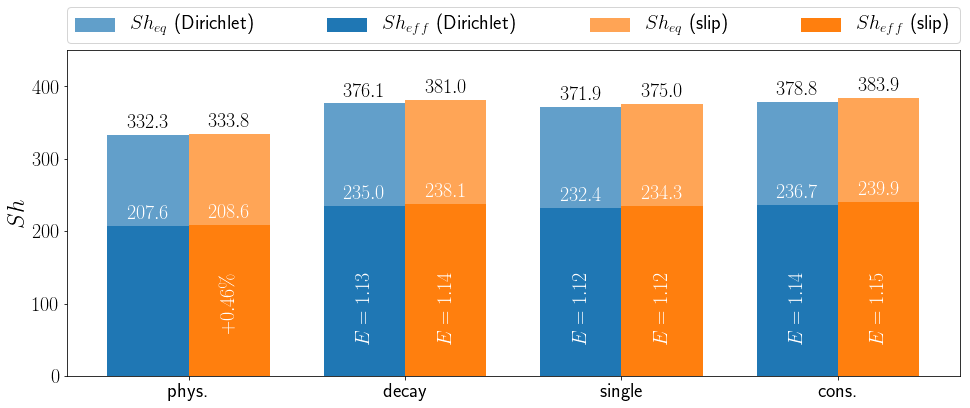

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(hm.figure_width, 6))

names_dir = ["bhaga_03_{:s}_m3".format(reaction) for reaction in ["phys", "decay", "single", "cons"]]
names_slip = ["bhaga_03_{:s}_slip_m3".format(reaction) for reaction in ["phys", "decay", "single", "cons"]]

sh_dir = []
sh_slip = []
for fdir, fslip in zip(names_dir, names_slip):
    data_dir = all_data[fdir]
    data_slip = all_data[fslip]
    sh_dir.append(data_dir[data_dir.t==10].gradA.values[0])
    sh_slip.append(data_slip[data_slip.t==10].gradA.values[0])
    
area_eff = all_data["bhaga_03_phys_m3"].area.values[-1] * 120.0 # area of 3° wedge slice x 120
area_eq = np.pi # equivalent diamter is always d_b=1

x = np.linspace(1, 5, 4)
ax.bar(x, np.asarray(sh_dir) * area_eff/area_eq, width=0.5, color="C0", alpha=0.7, label=r"$Sh_{eq}$ (Dirichlet)")
ax.bar(x, sh_dir, width=0.5, color="C0", label=r"$Sh_{eff}$ (Dirichlet)")
ax.bar(x+0.5, np.asarray(sh_slip) * area_eff/area_eq, width=0.5, color="C1", alpha=0.7, label=r"$Sh_{eq}$ (slip)")
ax.bar(x+0.5, sh_slip, width=0.5, color="C1", label=r"$Sh_{eff}$ (slip)")

# different Dirichlet/slip for physisorption
diff = (sh_slip[0] - sh_dir[0]) / sh_dir[0] * 100
ax.text(x[0]+0.5, 125, r"${:+1.2f}\%$".format(np.around(diff, 2)), color="w", fontsize=hm.fontsize_legend,
       rotation=90, ha="center")

# global Sherwood number text labels
offn = -10
offp = 10
for i, sh in enumerate(sh_dir):
    ax.text(x[i], sh-offn, r"${:1.1f}$".format(np.round(sh, 1)), ha="center", color="w", fontsize=hm.fontsize_legend)
    ax.text(x[i], sh * area_eff/area_eq + offp, r"${:1.1f}$".format(np.round(sh* area_eff/area_eq, 1)), ha="center", fontsize=hm.fontsize_legend)
for i, sh in enumerate(sh_slip):
    ax.text(x[i]+0.5, sh-offn, r"${:1.1f}$".format(np.round(sh, 1)), ha="center", color="w", fontsize=hm.fontsize_legend)
    ax.text(x[i]+0.5, sh * area_eff/area_eq + offp, r"${:1.1f}$".format(np.round(sh * area_eff/area_eq, 1)), ha="center", fontsize=hm.fontsize_legend)
    
# enhancement factors
E_dir = [sh / sh_dir[0] for sh in sh_dir[1:]]
E_slip = [sh / sh_slip[0] for sh in sh_slip[1:]]

for i, xi in enumerate(x[1:]):
    ax.text(xi, 125, r"$E={:1.2f}$".format(np.round(E_dir[i], 2)), rotation=90, color="w", fontsize=hm.fontsize_legend, ha="center")
    ax.text(xi+0.5, 125, r"$E={:1.2f}$".format(np.round(E_slip[i], 2)), rotation=90, color="w", fontsize=hm.fontsize_legend, ha="center")
    
ax.tick_params(which='major', labelsize=hm.fontsize_tick)
ax.set_ylabel(r"$Sh$", fontsize=hm.fontsize_label)
ax.set_ylim(0.0, 450)
ax.set_xticks(x+0.25)
ax.set_xticklabels(["phys.", "decay", "single", "cons."])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=4, mode="expand", borderaxespad=0., fontsize=hm.fontsize_legend)
savefig("bhaga_03_global_sh_dirichlet_vs_slip")

### Stable skirted

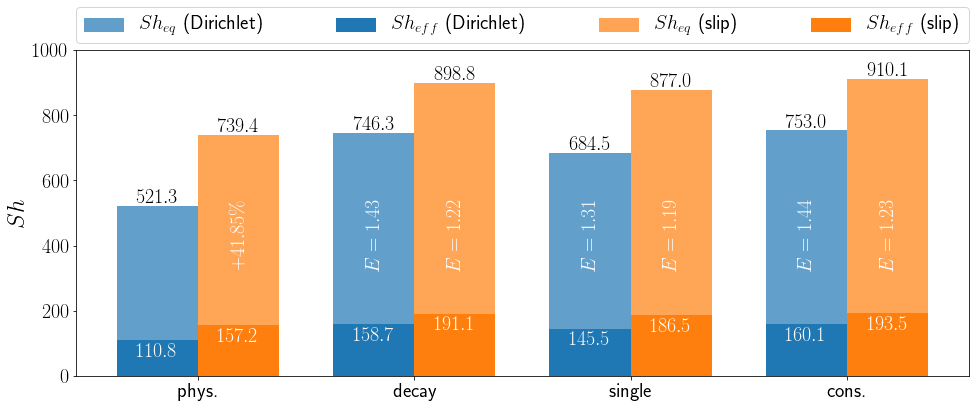

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(hm.figure_width, 6))

names_dir = ["bhaga_04_{:s}_m3".format(reaction) for reaction in ["phys", "decay", "single", "cons"]]
names_slip = ["bhaga_04_{:s}_slip_m3".format(reaction) for reaction in ["phys", "decay", "single", "cons"]]

sh_dir = []
sh_slip = []
for fdir, fslip in zip(names_dir, names_slip):
    data_dir = all_data[fdir]
    data_slip = all_data[fslip]
    sh_dir.append(data_dir[data_dir.t==10].gradA.values[0])
    sh_slip.append(data_slip[data_slip.t==10].gradA.values[0])
    
area_eff = all_data["bhaga_04_phys_m3"].area.values[-1] * 120.0 # area of 3° wedge slice x 120
area_eq = np.pi # equivalent diamter is always d_b=1

x = np.linspace(1, 5, 4)
ax.bar(x, np.asarray(sh_dir) * area_eff/area_eq, width=0.5, color="C0", alpha=0.7, label=r"$Sh_{eq}$ (Dirichlet)")
ax.bar(x, sh_dir, width=0.5, color="C0", label=r"$Sh_{eff}$ (Dirichlet)")
ax.bar(x+0.5, np.asarray(sh_slip) * area_eff/area_eq, width=0.5, color="C1", alpha=0.7, label=r"$Sh_{eq}$ (slip)")
ax.bar(x+0.5, sh_slip, width=0.5, color="C1", label=r"$Sh_{eff}$ (slip)")

# different Dirichlet/slip for physisorption
diff = (sh_slip[0] - sh_dir[0]) / sh_dir[0] * 100
ax.text(x[0]+0.5, 500, r"${:+1.2f}\%$".format(np.around(diff, 2)), color="w", fontsize=hm.fontsize_legend,
       rotation=90, ha="center")

# global Sherwood number text labels
offn = 50
offp = 10
for i, sh in enumerate(sh_dir):
    ax.text(x[i], sh-offn, r"${:1.1f}$".format(np.round(sh, 1)), ha="center", color="w", fontsize=hm.fontsize_legend)
    ax.text(x[i], sh * area_eff/area_eq + offp, r"${:1.1f}$".format(np.round(sh* area_eff/area_eq, 1)), ha="center", fontsize=hm.fontsize_legend)
for i, sh in enumerate(sh_slip):
    ax.text(x[i]+0.5, sh-offn, r"${:1.1f}$".format(np.round(sh, 1)), ha="center", color="w", fontsize=hm.fontsize_legend)
    ax.text(x[i]+0.5, sh * area_eff/area_eq + offp, r"${:1.1f}$".format(np.round(sh * area_eff/area_eq, 1)), ha="center", fontsize=hm.fontsize_legend)
    
# enhancement factors
E_dir = [sh / sh_dir[0] for sh in sh_dir[1:]]
E_slip = [sh / sh_slip[0] for sh in sh_slip[1:]]

for i, xi in enumerate(x[1:]):
    ax.text(xi, 500, r"$E={:1.2f}$".format(np.round(E_dir[i], 2)), rotation=90, color="w", fontsize=hm.fontsize_legend, ha="center")
    ax.text(xi+0.5, 500, r"$E={:1.2f}$".format(np.round(E_slip[i], 2)), rotation=90, color="w", fontsize=hm.fontsize_legend, ha="center")
    
ax.tick_params(which='major', labelsize=hm.fontsize_tick)
ax.set_ylabel(r"$Sh$", fontsize=hm.fontsize_label)
ax.set_ylim(0.0, 1000)
ax.set_xticks(x+0.25)
ax.set_xticklabels(["phys.", "decay", "single", "cons."])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
          ncol=4, mode="expand", borderaxespad=0., fontsize=hm.fontsize_legend)
savefig("bhaga_04_global_sh_dirichlet_vs_slip")